### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_blobs

### Sigmoid is classification fonction

In [2]:
def sigmoid(X):
    return (1 / (1+ np.exp(-X)))

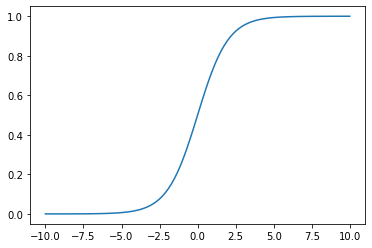

In [3]:
X=np.linspace(-10,10,100)
y= sigmoid(X)
plt.plot(X,y)

In [4]:
def sigmoid(X1, X2):
    # X1= ağırlık
    # X2 = çap
    b0 = -6 # intercept değeri
    b1 = 0.02
    b2 = 0.8
    Linear = b0 + b1*X1 + b2*X2
    return (1 / (1+ np.exp(-Linear)))

In [5]:
X1 = 60
X2 = 8
y_pred = sigmoid(X1, X2)
y_pred

0.8320183851339246

In [6]:
-np.log(y_pred)*y - (np.log(1-y_pred))* (1-y)

array([1.7838281 , 1.78381184, 1.78379194, 1.78376759, 1.78373778,
       1.78370131, 1.78365666, 1.78360203, 1.78353517, 1.78345336,
       1.78335323, 1.78323071, 1.78308079, 1.78289734, 1.78267288,
       1.78239825, 1.78206227, 1.78165127, 1.78114854, 1.78053369,
       1.77978184, 1.77886264, 1.77773909, 1.77636616, 1.77468908,
       1.77264136, 1.77014236, 1.76709459, 1.7633804 , 1.75885836,
       1.75335907, 1.74668068, 1.73858413, 1.72878843, 1.71696644,
       1.70274176, 1.68568777, 1.66532996, 1.64115344, 1.61261731,
       1.57917801, 1.54032342, 1.49561819, 1.44475941, 1.38763866,
       1.3244033 , 1.25550645, 1.18173351, 1.10419375, 1.02427046,
       0.94353102, 0.86360773, 0.78606797, 0.71229503, 0.64339818,
       0.58016282, 0.52304208, 0.47218329, 0.42747806, 0.38862347,
       0.35518417, 0.32664804, 0.30247152, 0.28211371, 0.26505972,
       0.25083504, 0.23901305, 0.22921735, 0.2211208 , 0.21444241,
       0.20894312, 0.20442108, 0.20070689, 0.19765912, 0.19516

In [7]:
-np.log(0.12)

2.120263536200091

In [8]:
-np.log(0)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


inf

In [9]:
-np.log(0.12)

2.120263536200091

In [10]:
def loss(y, y_pred): # calculating loss func
    return -np.log(y_pred)*y - (np.log(1-y_pred))* (1-y)

In [11]:
loss(1, 0)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


inf

In [12]:
loss(1, 0.88)

0.12783337150988489

In [13]:
y_pred= np.linspace(0.01, 0.99, 100)

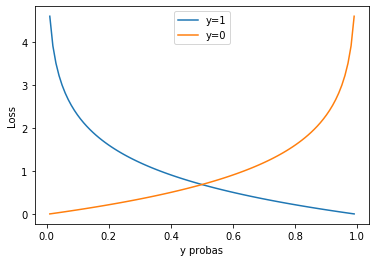

In [14]:
plt.plot(y_pred, loss(1, y_pred), label= "y=1")
plt.plot(y_pred, loss(0, y_pred), label= "y=0")
plt.xlabel("y probas")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
import numpy as np
from warnings import warn
def sigmoid(X):
    return (1 / (1+ np.exp(-X)))


class Logistic:

    def __init__(self, fit_intercept=True, cozum="Normal", lr=0.01, tol=10**-6, max_iter=10000, lamda=0.0):
        self.fit_intercept = fit_intercept
        self.cozum = cozum
        self.b = None
        self.lr=lr
        self.tol=tol
        self.max_iter=max_iter
        self.lamda=lamda

    def __repr__(self):
        return f"Linear(cozum={self.cozum},lr={self.lr})"

    def katsayi(self, X,y):
        if self.cozum == 'Normal':
            self._normal(X, y)
        elif self.cozum == 'Gradient':
            self._gradient(X, y)
        else:
            raise ValueError('Gecersiz cozum yontemi.')
        return self
    
    
    def fit(self, X,y):
        return self.katsayi(X,y)

    
    def _gradient(self, X, y, normalize=False):
        if self.fit_intercept:
            birler = np.ones((X.shape[0], 1))
            X = np.hstack([birler, X])

        b = np.random.randn(X.shape[1], y.shape[1])

        for iter_ in range(self.max_iter):
            y_pred = sigmoid(X @ b)  # feed_forward
            L = -np.log(y_pred)*y - (np.log(1-y_pred))* (1-y)
            #print("L shape= ", L.shape) 
            dy_pred  = (-y / y_pred) - (-1 / (1-y_pred)) * (1-y)
            dz = y_pred * (1-y_pred)
            dw = X.T
            gradient = dw @(dy_pred * dz)
            #print(gradient.shape)
#             dw @ ((-y / y_pred) - (-1 / 1-y_pred) * (1-y)) *( y_pred * (1-y_pred))
            regterm=(2 * self.lamda * b)
            dw = gradient +  regterm  # back_propogation
            b = b - self.lr * (dw)

            is_converged = (dw < self.tol).all()
            if is_converged:
                break

        if not is_converged:
            warn('Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.')

        self.b = b

    def tahmin_et(self, X):
        if self.fit_intercept:
            birler = np.ones((X.shape[0],1))
            X= np.hstack([birler , X])
        
        y_pred= sigmoid(X @ self.b)
        return y_pred
    
    def predict(self, X):
        return self.tahmin_et(X)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == (y_pred >= 0.5))
    

In [16]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=500)

In [17]:
X.shape

(500, 20)

In [18]:
y= y.reshape(-1,1)
y.shape

(500, 1)

In [19]:
classifier = Logistic(cozum= "Gradient", lr=0.001, max_iter=10000)
classifier.fit(X,y)
y_pred = classifier.predict(X)
classifier.score(X,y)

0.928

In [20]:
classifier.b

array([[-0.58855837],
       [ 0.20358948],
       [ 0.33537448],
       [ 0.05508667],
       [-0.45783524],
       [ 3.50472971],
       [-0.06612539],
       [ 0.31748318],
       [ 1.0538892 ],
       [-0.1606451 ],
       [-0.07422993],
       [-0.13160474],
       [ 0.13209871],
       [-0.03587944],
       [-0.28358233],
       [ 0.05144205],
       [ 0.35025238],
       [ 0.06671076],
       [-0.02847738],
       [-0.14413699],
       [ 0.23060677]])

In [21]:
clasi = LogisticRegression()
clasi.fit(X,y)
clasi.predict(X)
clasi.score(X,y)

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.924

In [100]:
import numpy as np
from warnings import warn
def sigmoid(X):
    return (1 / (1+ np.exp(-X)))


class MultiLogistic(Logistic): # Logistic inherit ettiğimiz için aşağıdaki metodları tekrar kullanmaya gerek yok.
    
    def __init__(self, fit_intercept=True, cozum="Gradient", lr=0.01, tol=10**-6, max_iter=10000, lamda=0.0):
        self.models = []
        self.fit_intercept = fit_intercept
        self.cozum = cozum
        self.b = None
        self.lr=lr
        self.tol=tol
        self.max_iter=max_iter
        self.lamda=lamda

    def get_params(self, deep=True):
        param = ["fit_intercept","cozum","lr","tol","max_iter","lamda"]
        return {p:getattr(self,p) for p in param}
        
    def __repr__(self):
        return f"Logistic(cozum={self.cozum},lr={self.lr})"

    def katsayi(self, X,y):
        encoded = (y == sorted(set(y.ravel()))).astype(int)
        for col in encoded.T:
            model = Logistic(**self.get_params())
            model.fit(X,col.reshape(-1,1))
            self.models.append(model)
        return self
        
#     def fit(self, X,y):
#         return self.katsayi(X,y)

    def tahmin_et(self, X):
        kolonlar = self.predict_proba(X)
        return kolonlar.argmax(axis=1)
    
#     def predict(self, X):
#         return self.tahmin_et(X)
    
    def predict_proba(self,X):
        kolonlar = []
        for model in self.models:
            y_pred_c = model.predict(X)
            kolonlar.append(y_pred_c.ravel())
        kolonlar = np.array(kolonlar).T
        return np.exp(kolonlar)/np.exp(kolonlar).sum(axis=1,keepdims=True)        
        
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y.ravel() == (y_pred.ravel()))

# Example:

In [101]:
X, y = make_blobs(centers=4,random_state=42)

In [102]:
model = MultiLogistic(cozum="Gradient", lr=0.001)

In [103]:
model.fit(X,y.reshape(-1,1))

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Model yakinsamadi. Azami iterasyon sayisini arttirmayi deneyiniz.


Logistic(cozum=Gradient,lr=0.001)

In [104]:
model.tahmin_et(X)

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 1, 3, 1, 2, 0,
       0, 2, 2, 3, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3,
       2, 3, 1, 2, 1, 2, 3, 0, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 3, 1], dtype=int64)

In [105]:
model.score(X,y)

1.0

In [106]:
model.predict_proba(X)[0:5,:]

array([[0.17538459, 0.17537271, 0.17570658, 0.47353612],
       [0.17486123, 0.17487067, 0.4753221 , 0.174946  ],
       [0.47193126, 0.17447665, 0.17447523, 0.17911686],
       [0.17486432, 0.17490988, 0.47533052, 0.17489528],
       [0.17954638, 0.17543523, 0.17543561, 0.46958278]])

In [107]:
model.get_params()

{'fit_intercept': True,
 'cozum': 'Gradient',
 'lr': 0.001,
 'tol': 1e-06,
 'max_iter': 10000,
 'lamda': 0.0}

# Kenar Çözümler / Örnekler

In [60]:
a = [0.15, 0.23, 0.81]

In [65]:
np.exp(a)/np.exp(a).sum() # softmax

array([0.24887512, 0.2696032 , 0.48152168])

In [66]:
a/np.sum(a)

array([0.12605042, 0.19327731, 0.68067227])

In [68]:
a = [[0.15, 0.23, 0.81], [0.15, 0.23, 0.81]]

In [71]:
np.exp(a)/np.exp(a).sum(axis=1,keepdims=True)

array([[0.24887512, 0.2696032 , 0.48152168],
       [0.24887512, 0.2696032 , 0.48152168]])

In [29]:
y = np.random.randint(0,3,size=(10,1))

In [30]:
y

array([[0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2]])

In [35]:
(y == sorted(set(y.ravel()))).astype(int)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])